<div style="align: center;">
    <br>
    <img src="https://vinformateur.com/wp-content/uploads/2022/11/vins-famille-perrin-horiz.jpg" style="display:block; margin:auto; width:85%; height:400px;">
</div><br><br> 

<div style="letter-spacing:normal; opacity:1.;">
<!--   https://xkcd.com/color/rgb/   -->
  <p style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>Perrin Freres Monthly Champagne Sales Prediction</strong></p>  
  
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.0; font-size:28px; font-weight:normal; text-transform: capitalize; padding: 5px;"
            >Machine Learning Module: Complete Guide to Time Series Forecasting (ARIMA and SARIMAX)</p> 
    
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:18px; font-weight:normal; text-transform: capitalize; padding: 5px;"
            >ARIMA (Autoregressive Integrated Moving Average) Model<br>
      SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous Regressors) Model</p>     
</div>

- https://grape-to-glass.com/index.php/wine-bottle-sizes/
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html#statsmodels.tsa.arima.model.ARIMA
- https://alkaline-ml.com/pmdarima/modules/classes.html
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

**Dataset Info**

The dataset is monthly sales of champagne from year 1964 to 1972.


**TASK**

Using ARIMA model, you can forecast a time series using the series past values. In this notebook, we build an optimal ARIMA model and extend it to Seasonal ARIMA (SARIMA) and SARIMAX models. You will also see how to build autoarima models in python.


**Summary of Time Series**

ARMA (Autoregressive Moving Average) models are commonly used in time series analysis. The general formula for an ARMA model is:

> <pre><b>Y<sub>t</sub> = c + Σ(AR term ) + Σ(MA term ) + ε<sub>t</sub></b></pre>
  <pre><b>Y<sub>t</sub> = c + Σ(ϕ<sub>i</sub> * Y<sub>t-i</sub>) + Σ(θ<sub>i</sub> * ε<sub>t-i</sub>) + ε<sub>t</sub></b></pre>

Where:

- Y<sub>t</sub> represents the value of the time series at time t.
- c is a constant term or intercept.
- The autoregressive (AR) term captures the relationship between the current observation and previous observations.
- The moving average (MA) term captures the relationship between the error terms.
- ε<sub>t</sub> is the error term at time t, representing the deviation between the predicted and actual values.

The ARMA model combines the autoregressive (AR) and moving average (MA) components to model the dependence between the current observation and previous observations, as well as the dependence between the error terms.


**Patterns in a time series**

A time series can be divided into components: base level, trend, seasonality (or cyclic), and error.

- Trend: It represents the overall increasing or decreasing pattern observed in the time series.
- Seasonality: It refers to the repeated pattern observed at regular intervals due to seasonal factors, such as month of the year, day of the month, weekdays, or time of the day.

These components help in understanding and modeling the patterns present in the time series data.


**Additive and multiplicative time series**

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components.


**Table of Contents**

- Import Li̇brari̇es & Ingest Data
- Recogni̇zi̇ng And Understandi̇ng Data
- Exploratory Data Analysis (EDA)
- Data Preprocessing
- Implement ARIMA Model
    - How to find the order of differencing (d) in ARIMA model
    - How to find the order of the AR term (p)
    - How to find the order of the MA term (q)     
    - How to build the ARIMA Model
    - How to do find the optimal ARIMA model manually using Out-of-Time Cross validation
    - Accuracy Metrics for Time Series Forecast
    - How to do Auto Arima Forecast in Python
    - How to interpret the residual plots in ARIMA model
- Implement SARIMAX Model
    - How to build SARIMAX Model with exogenous variable
- Conclusion

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>1. Import Libraries & Ingest Data</strong></h1>   
</div>

<h4>pip freeze</h4>

In [1]:
# # Download whl package install for offline mode
# !curl -s --create-dirs --output-dir "." -O https://files.pythonhosted.org/packages/7c/47/32520e259340c140a4ad27c1b97050dd3254fdc517b1d59974d47037510e/scikit_plot-0.3.7-py3-none-any.whl
# !wget -N -q -P "." https://files.pythonhosted.org/packages/7c/47/32520e259340c140a4ad27c1b97050dd3254fdc517b1d59974d47037510e/scikit_plot-0.3.7-py3-none-any.whl

In [2]:
%%writefile requirements.txt

# Visualization
matplotlib==3.7.1             # 3.5.3
seaborn==0.12.2

# ML Time Series Modules 
statsmodels==0.14.0
pmdarima==2.0.3
prophet==1.1.4

# DL Time Series Modules 
tensorflow==2.12.0
scikit-plot==0.3.7
# scikit_plot-0.3.7-py3-none-any.whl
# ipywidgets==7.7.1

Overwriting requirements.txt


In [3]:
import os, sys, platform
print("Python  :", sys.version)
print("Platform:", platform.platform())

!{sys.executable} -m pip install -Uq -r requirements.txt  #  --no-deps --no-index  --force-reinstall

Python  : 3.9.16 (main, Mar  8 2023, 14:00:05) 
[GCC 11.2.0]
Platform: Linux-5.10.102.1-microsoft-standard-WSL2-x86_64-with-glibc2.35


## Importing Related Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Pandas 
# from pandas.plotting import autocorrelation_plot
# from pandas.tseries.offsets import DateOffset
# from dateutil.parser import parse

# Auto Regressive Model
import statsmodels.api as sm
# from statsmodels.tsa.stattools import adfuller, kpss
# from statsmodels.tsa.stattools import acf, pacf
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# one-step Holt Winter’s Exponential Smoothing forecast
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from statsmodels.tsa.api import ExponentialSmoothing , SimpleExpSmoothing,Holt
# from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
# from pmdarima import auto_arima
# from pmdarima.arima.utils import ndiffs

# Prophet Model
# from prophet import Prophet

# import re
# import time
import pickle
# import random
# import warnings
# import tempfile
# import importlib

from glob import glob
# from typing import cast
# from pathlib import Path
from tqdm.notebook import tqdm
# from joblib import Parallel, delayed
# from multiprocessing import cpu_count

import gc
gc.collect()

0

## Parameters

In [5]:
random_state = 101

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>2. Recognizing and Understanding Data</strong></h1>   
</div>

In [6]:
df = pd.read_csv(r'./perrin-freres-monthly-champagne-sales.csv') # parse_dates=['Month'], index_col='Month'

# Changing the column name, Cleaning up the data, Drop last 2 rows
df.columns=["Month", "Sales"]
df.dropna(inplace=True)

# Convert Month into Datetime
df['Month'] = pd.to_datetime(df['Month'])

# Check the data type
display(df.dtypes)

# Setting Timesatmps as Index, X is a pandas object with a timeseries index
df.set_index('Month', inplace=True)
df.index = pd.DatetimeIndex(df.index, freq=pd.infer_freq(df.index))  # for freq='MS', arima warning
df.sort_index(inplace=True)
df

Month    datetime64[ns]
Sales           float64
dtype: object

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,105.0,4761.152381,2553.502601,1413.0,3113.0,4217.0,5221.0,13916.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


# Exploratory Data Analysis

## Visualize the Data

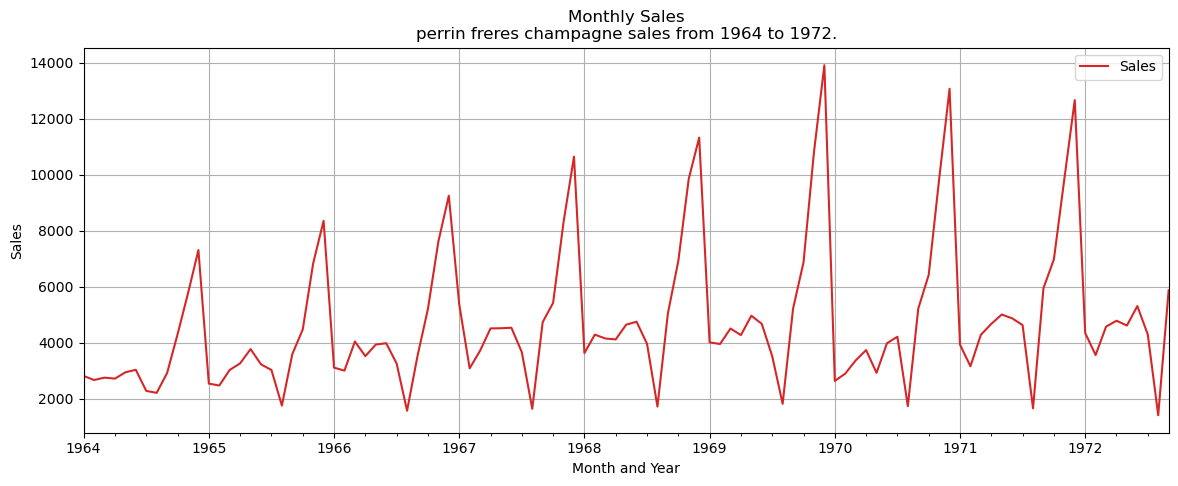

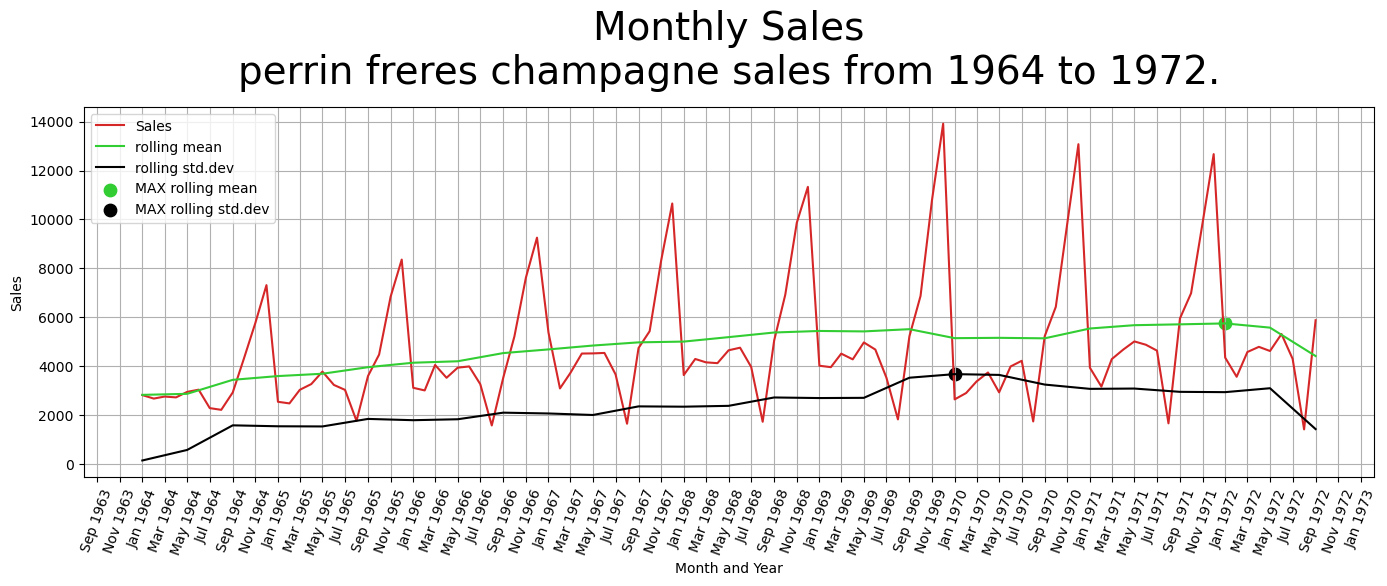

In [9]:
def plot_df(df, x, y, title="", xlabel='Month and Year', ylabel="", dpi=100):
    fig = plt.figure(figsize=(14, 6), dpi=dpi)
    sns.lineplot(x=x, y=y, color='tab:red', estimator='mean', errorbar="sd", dashes=False, markers=True, label=y.name)
#     plt.plot(x, y, color='tab:red', label=y.name)
#     sns.relplot(data=df, x=x, y=y, kind="line", height=5, aspect=2.5, color='tab:red', 
#                 estimator='mean', errorbar="sd", dashes=False, markers=True, label=y.name);

    # visualsing data in terms of rolling statistical measures
    roll_mean    = y.rolling(window=12, step=4, min_periods=2, center=True).mean()
    roll_std_dev = y.rolling(window=12, step=4, min_periods=2, center=True).std()
    plt.plot(roll_mean,    color="limegreen", label="rolling mean")
    plt.plot(roll_std_dev, color="k",         label="rolling std.dev")
    plt.scatter(roll_mean.idxmax(), roll_mean.max() , marker='o', s=80, color='limegreen', label='MAX rolling mean')
    plt.scatter(roll_std_dev.idxmax(), roll_std_dev.max() , marker='o', s=80, color='k', label='MAX rolling std.dev')

    # Set the x-axis tick frequency to each month
    plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator(interval=2))

    # Set the x-axis label format
    date_fmt = mpl.dates.DateFormatter('%b %Y')
    plt.gca().xaxis.set_major_formatter(date_fmt)

    # Set the title, the x-axis label    
    plt.gca().set(xlabel=xlabel, ylabel=y.name)
    
    # Set the font size of the title
    plt.title(title, y=1.04, fontsize=28)

    # Rotate the x-axis tick labels for better visibility
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.legend()
    plt.grid()
    plt.show()


# df.plot();
df['Sales'].plot(figsize=(14, 5), grid=True, legend=True, color='tab:red',
                 xlabel='Month and Year', ylabel='Sales',
                 title='Monthly Sales\nperrin freres champagne sales from 1964 to 1972.');

plot_df(df, x=df.index, y=df['Sales'], title='Monthly Sales\nperrin freres champagne sales from 1964 to 1972.') 

**Note**:

1. Since all values are positive, you can show this on both sides of the Y axis **(Two Side View)** to emphasize the growth.

2. From the plot, we are seeing that it's kind of a **seasonal data**. It may not be stationary. To clarify the confusion, we can apply here the **'Dickey Fuller Test'** to see whether it is **Stationary or Non-Stationary Time Series**.


Q: How to test for stationarity?

A: You need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called **Unit Root Tests**. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:

- **Augmented Dickey Fuller test (ADH Test)**
- Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
- Philips Perron test (PP Test)

The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

### Two Side View

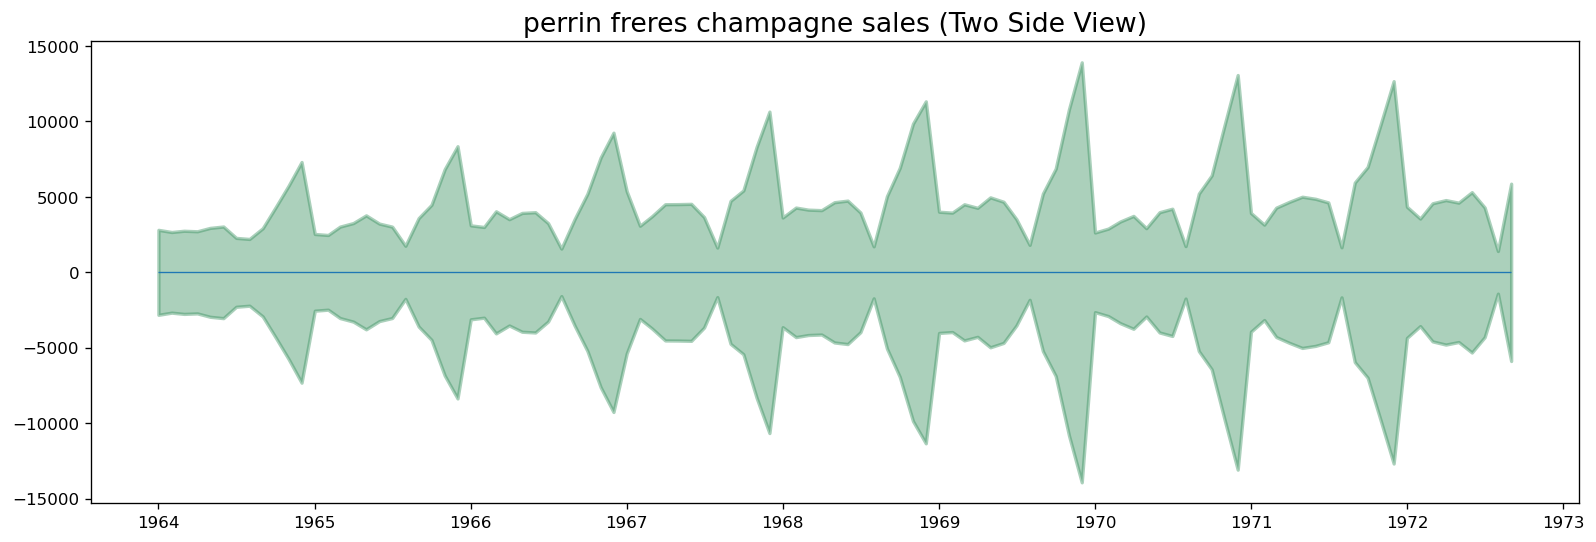

In [10]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(df.index, y1=df['Sales'], y2=-df['Sales'], alpha=0.4, linewidth=2, color='seagreen')
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.8)
plt.title('perrin freres champagne sales (Two Side View)', fontsize=16)
# plt.ylim(-800, 800)
plt.show()

**Note**:

Since its a monthly time series and follows a certain repetitive pattern every year, you can **plot each year** as a **separate line** in the same plot. This lets you **compare the year wise patterns side-by-side**.

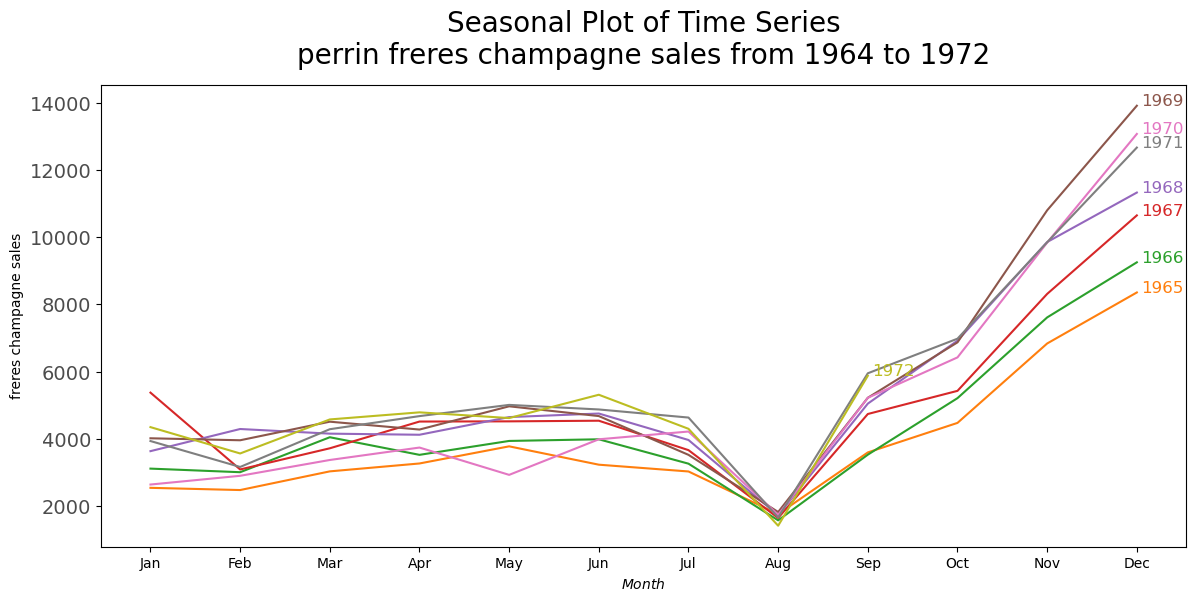

In [11]:
# Prep Colors
np.random.seed(100)
# colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(df.index.year.unique()), replace=False)
colors = [f"C{i}" for i in range(len(df.index.year.unique()))]


# Seasonal Plot Each Year of a Time Series
plt.figure(figsize=(14,6), dpi= 100)
for i, y in enumerate(df.index.year.unique()):
    if i > 0:        
        plt.plot(df.loc[df.index.year==y, :].index.strftime('%b'), df.loc[df.index.year==y, :]['Sales'], 
                 color=colors[i], label=y)
        plt.text(df.loc[df.index.year==y, :].shape[0]-.95, df.loc[df.index.year==y, 'Sales'][-1:].values[0], y, 
                 # position=(i*365-y , df.loc[df.index.year==y, 'Sales'][-1:].values[0]), 
                 color=colors[i], fontsize=12)

# Decoration
plt.gca().set(ylabel='freres champagne sales', xlabel='$Month$')
plt.yticks(fontsize=14, alpha=.7)
plt.title("Seasonal Plot of Time Series\nperrin freres champagne sales from 1964 to 1972", fontsize=20, pad=15)
plt.show()

**Note**:

In a specific line of sales spanning from January to July, there is a noticeable trend. During the **month of July**, Champagne sales experience a significant **decline**, only to **rebound from August to December**. This predictable cycle continues without interruption, **repeating itself year after year**. It is undeniable that this recurring pattern persists consistently in every given year.

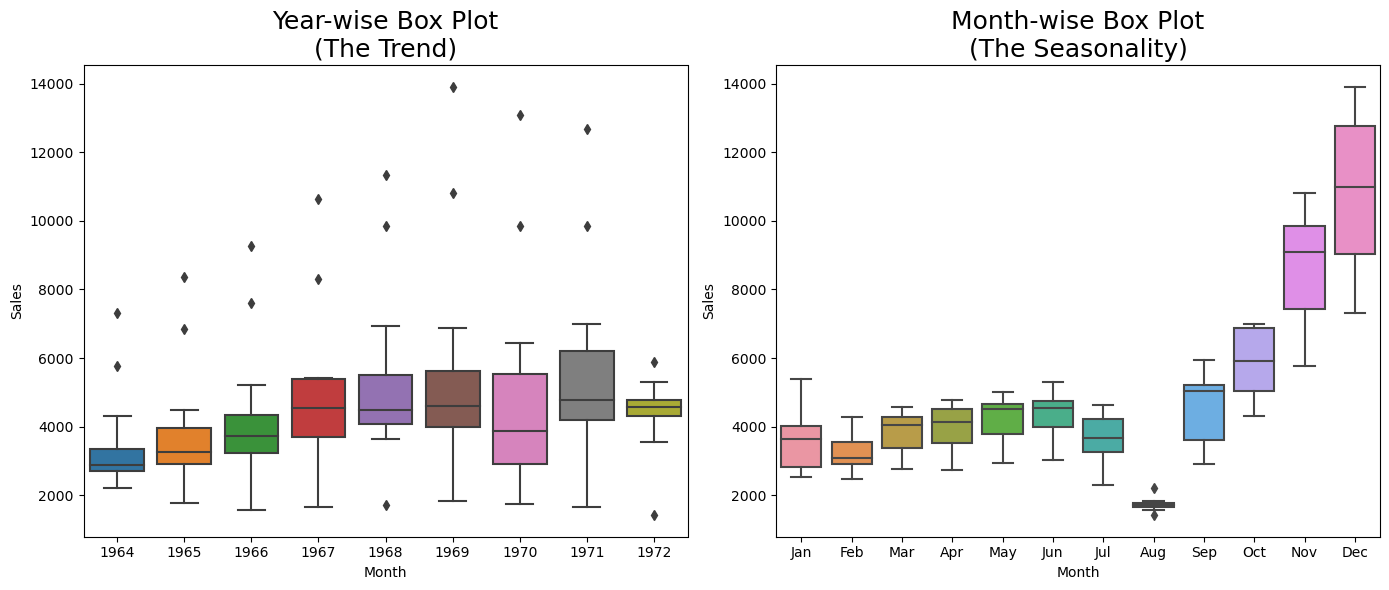

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi= 100)

# Boxplot of Year-wise (trend) Distribution, Draw Plot
sns.boxplot(x=df.index.year, y='Sales', data=df, ax=axes[0])
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);

# Boxplot of Month-wise (Seasonal) Distribution, Draw Plot
sns.boxplot(x=df.index.strftime('%b'), y='Sales', data=df, ax=axes[1])
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)

plt.tight_layout()
plt.show()

**Note**:

1. Box plots make the distribution of data apparent both on an **annual and monthly basis**. Additionally, within a monthly box plot, it is evident that **November and December** have notably **higher Champagne sales**, which can be attributed to **year-end celebrations**.


Q: Up until now, we have **observed similarities** to identify the pattern. Now, how can **any deviations** from the norm be detected?

A: Indeed, one way to detect deviations from the normal pattern is through the **decomposition of a time series**. By decomposing a time series into its underlying components, such as trend, seasonality, and residual (or error), it becomes easier to identify any anomalous behavior or outliers that deviate from the expected pattern. The decomposition process allows us to analyze and understand the individual components of the time series, enabling us to detect any unusual variations or deviations from the norm.

## Decomposition of a Time Series

A time series may be imagined as a combination of the trend, seasonality and the error terms.

Additive time series:
> Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
> Value = Base Level x Trend x Seasonality x Error

- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/#:~:text=Time%20series%20decomposition%20involves%20thinking,time%20series%20analysis%20and%20forecasting.

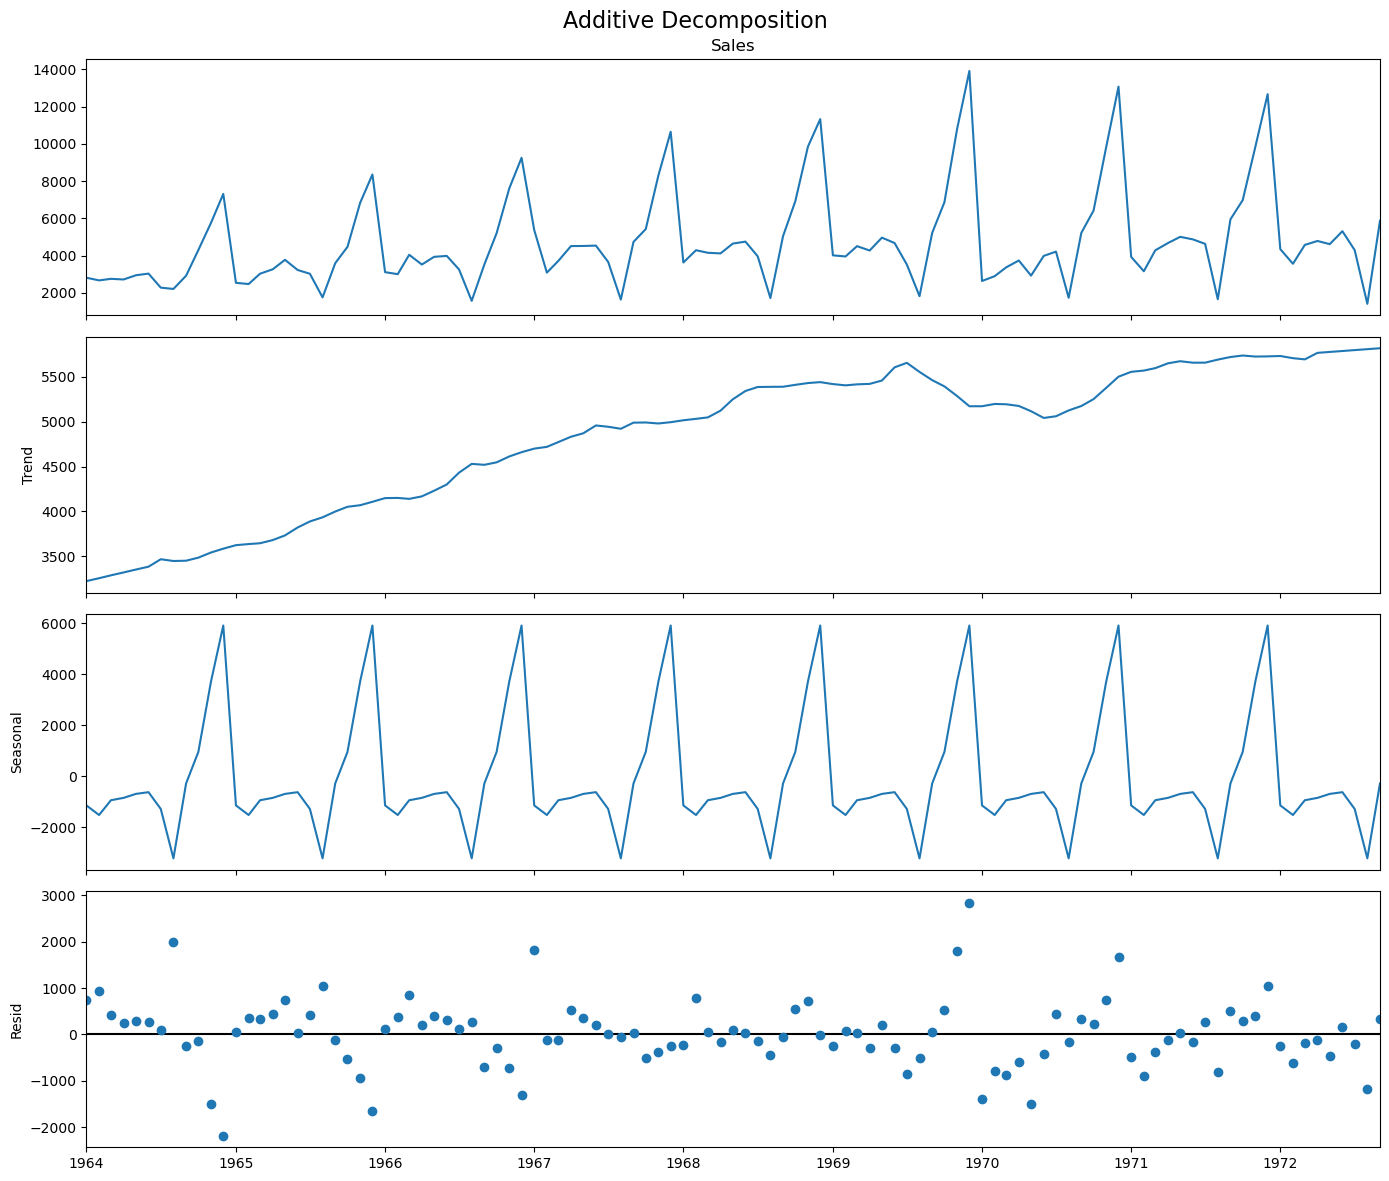

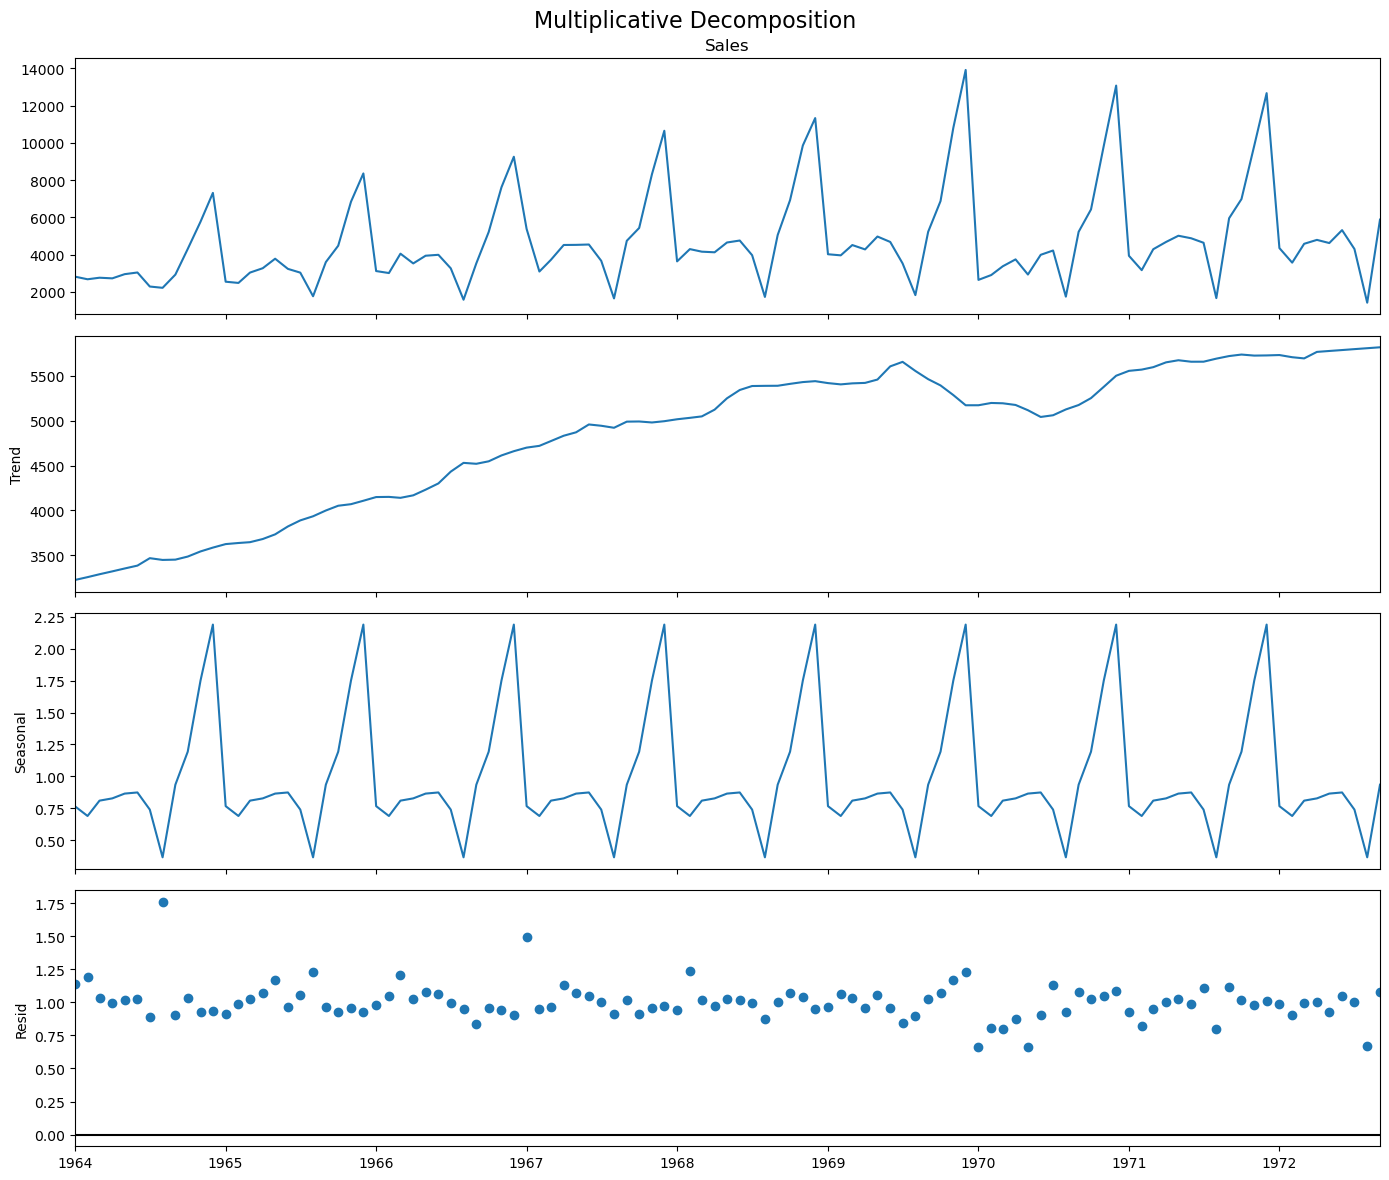

In [13]:
# Setting extrapolate_trend='freq' takes care of any missing values in trend and residuals at the beginning of series.

# Additive Decomposition
additive_decomposition = sm.tsa.seasonal_decompose(df['Sales'], model='additive', 
                                                   period=None, extrapolate_trend='freq')
# Multiplicative Decomposition 
multiplicative_decomposition = sm.tsa.seasonal_decompose(df['Sales'], model='multiplicative', 
                                                         period=None, extrapolate_trend='freq')

# Additive Plot
plt.rcParams.update({'figure.figsize': (14, 12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout()

# Multiplicative Plot
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)

plt.tight_layout()
plt.show()

**Note**:

If you look at the residuals of the **additive decomposition** closely, it has some pattern **left over** and **right over**. The **multiplicative decomposition**, however, looks **quite random** which is **good**. So ideally, multiplicative decomposition should be preferred for this particular series.

In [14]:
# Extract the Components: multiplicative_decomposition
# If you check, the product of seas, trend and resid columns should exactly equal to the actual_values.
# Actual Values = Product of (Seasonal * Trend * Resid)
result_mul = multiplicative_decomposition

df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed

,seas,trend,resid,actual_values
Month,,,,
1964-01-01,0.766088,3223.150010,1.140038,2815.0
1964-02-01,0.688953,3255.293366,1.191397,2672.0
1964-03-01,0.809228,3287.436723,1.035603,2755.0
1964-04-01,0.826961,3319.580080,0.991197,2721.0
1964-05-01,0.864521,3351.723436,1.016691,2946.0
...,...,...,...,...
1972-05-01,0.864521,5777.413801,0.924581,4618.0
1972-06-01,0.873394,5787.696144,1.050854,5312.0
1972-07-01,0.738935,5797.978487,1.003191,4298.0


# Data Preprocessing


## Stationary or Non-Stationary Time Series

### Augmented Dickey Fuller Testing (ADH Test) For Stationarity


**Dickey-Fuller test** is a statistical test used to determine if a time series data is stationary or not. 

**Stationarity** refers to a time series where statistical properties remain constant over time. It means a constant mean, variance, and autocovariance. Stationarity is important in modeling because it simplifies analysis, enables accurate parameter estimation, and facilitates reliable forecasting. 

**Non-stationary** series exhibit changing patterns, making modeling and prediction challenging. By ensuring stationarity, models like ARIMA can be effectively applied, parameter significance can be interpreted, and valid inferences can be drawn.

**The test evaluates** the null hypothesis that the time series has a unit root, indicating non-stationarity. If the test statistic is greater than the critical value, the null hypothesis is rejected, suggesting stationarity. This test is widely used in **econometrics** and **time series analysis** to ensure that data meets the assumptions necessary for accurate modeling and forecasting.

- https://www.simplilearn.com/tutorials/statistics-tutorial/p-value-in-statistics-hypothesis

In [15]:
# Dickey Fuller Testing For Stationarity
# Ho : Data is not Stationary : NULL hypothesies
# H1 : Data is Stationary     : alternate hypothesies

def adfuller_test(sales):
    labels  = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    results = sm.tsa.stattools.adfuller(sales, autolag='AIC')
    for label, result in zip(labels, results):
        if label == 'p-value':
            print(f'{label:<30}: {result:2.0e}')
            continue            
        print(f'{label:<30}: {result:.2f}')
    for key, value in results[4].items():
        print(f'{"Critical Values":<30}: {key:<5} {value:.3f}')
    if results[1] <= 0.05:
        print('\nStrong evidence against the NULL hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is "stationary".')
    else:
        print('\nWeak evidence against the NULL hypothesis (Ho), time series has a unit root, indicating it is "non stationary".')

        
# test_result = adfuller(df['Sales'])
adfuller_test(df['Sales'])

ADF Test Statistic            : -1.83
p-value                       : 4e-01
#Lags Used                    : 11.00
Number of Observations Used   : 93.00
Critical Values               : 1%    -3.503
Critical Values               : 5%    -2.893
Critical Values               : 10%   -2.584

Weak evidence against the NULL hypothesis (Ho), time series has a unit root, indicating it is "non stationary".


**Note**:

1. As the P-value 0.4 is grater than 0.05, the Dickey Fuller Test tells us that the data is **Not Stationary**.
Now it's time to *<ins>make the data stationary</ins>*.


Q: How to make a time series stationary?

A: You can make series stationary by:

- Differencing the Series (once or more)
- Take the log of the series
- Take the nth root of the series
- Combination of the above

The most common and convenient method to stationarize the series is by **differencing the series** at least once until it becomes approximately stationary.

### Making the data Stationary by Differencing (Integrated)

As the data is **seasional** and each year consists **12 month**, from the graph we are seeing that the per cycle difference of the data is **12 months**.

That's why we will **shift 12** here and the substraction from the **'Sales'** column will be stored in a new column titled **'seasonal_first_difference'**.

In [16]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Freq: MS, Name: Sales, Length: 105, dtype: float64

In [17]:
# Sales Differencing
df['Sales First Difference']    = df['Sales'] - df['Sales'].shift(1)

# Seasonal Differencing
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


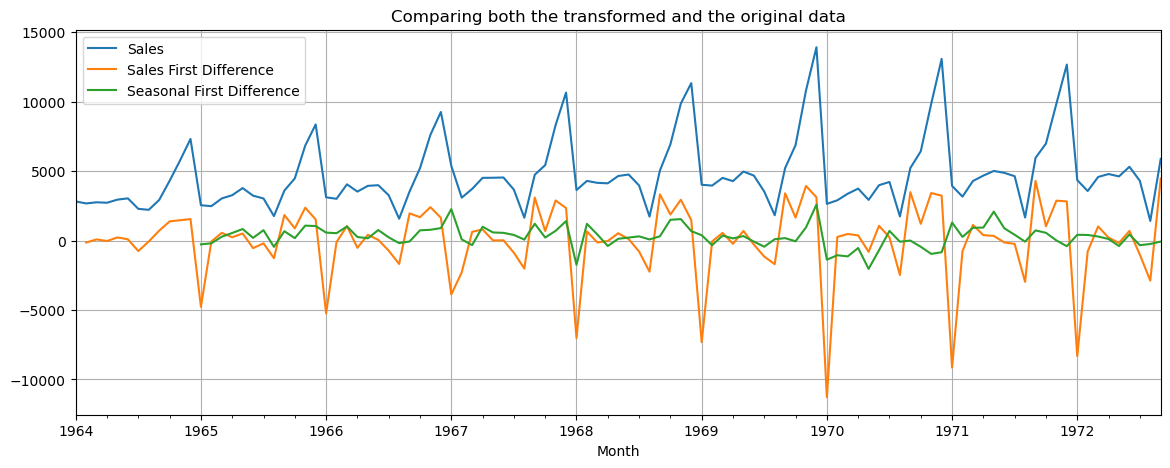

In [18]:
# Comparing both the transformed and the original data
df.plot(figsize=(14, 5), grid=True, legend=True, title="Comparing both the transformed and the original data");

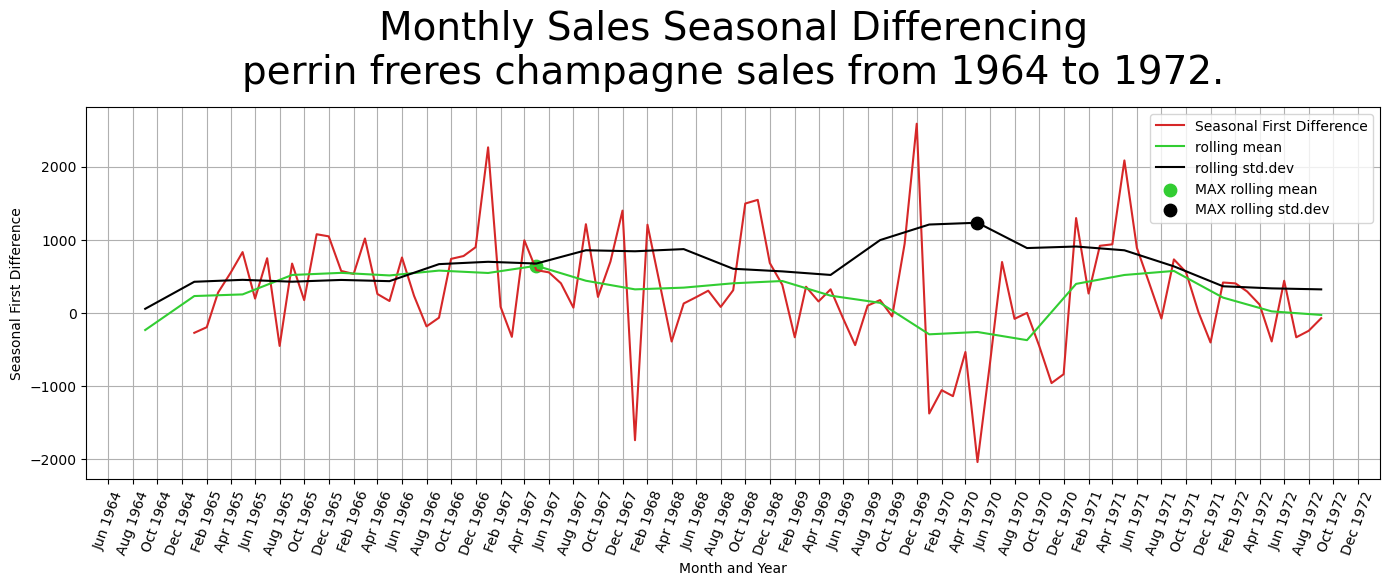

In [19]:
# Plot the Seasonal Differencing
plot_df(df, x=df.index, y=df['Seasonal First Difference'], ylabel='Seasonal First Difference',
        title='Monthly Sales Seasonal Differencing\nperrin freres champagne sales from 1964 to 1972.') 

## Again Applying Dickey Fuller Test

Now, we want to see if our new data became **stationary** or not.
But this time we should pay extra attention to **'dropna()'**. Because for shifting 12, the 1st 12 values of the **'seasional_first_difference'** will be NaN. We have to **keep them aside**.

In [20]:
# Again Dickey Fuller test on Seasonal Differencing
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic            : -7.19
p-value                       : 3e-10
#Lags Used                    : 11.00
Number of Observations Used   : 92.00
Critical Values               : 1%    -3.504
Critical Values               : 5%    -2.894
Critical Values               : 10%   -2.584

Strong evidence against the NULL hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is "stationary".


In [21]:
# Again Dickey Fuller test on Seasonal Differencing
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic            : -7.63
p-value                       : 2e-11
#Lags Used                    : 0.00
Number of Observations Used   : 92.00
Critical Values               : 1%    -3.504
Critical Values               : 5%    -2.894
Critical Values               : 10%   -2.584

Strong evidence against the NULL hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is "stationary".


**Note**:

Done! As our P-value this time becomes less than 0.05, we can easily tell **_<ins>this data a stationary one</ins>_**.

# AUTO-CORRELATION | PARTIAL AUTO-CORRELATION ANALYSIS:

- **Look for significant autocorrelation values**: In the autocorrelation plot, observe the autocorrelation coefficients. Look for values that fall outside the dashed blue lines, which represent the confidence interval. Correlation values outside this interval are typically considered statistically significant. Significant autocorrelation at a specific lag suggests a relationship or pattern in the data.

- **Identify significant peaks or spikes**: Look for prominent peaks or spikes in the autocorrelation plot. These peaks indicate strong correlations at certain lag values. Identify the lags corresponding to these peaks as they may be important for understanding the underlying patterns in the data.

- **Consider the problem and domain knowledge**: Take into account the specific problem you are analyzing and any domain knowledge you have. For example, if you are analyzing daily stock prices, you may want to look for autocorrelation at lags representing weekly or monthly patterns. Understanding the context of the data can help guide your choice of lag.

- **Consider expected behavior and seasonality**: Think about the expected behavior of the time series and any known seasonality. If the data exhibits a seasonal pattern, look for significant autocorrelation at multiples of the seasonal period. This can help capture and model the seasonal component of the data.

By considering these factors and interpreting the autocorrelation plot, you can identify the lag values that exhibit significant autocorrelation. These lag values can then be used for further analysis, modeling, or forecasting of the time series.

- **PACF** is most suitable for determining the **lag values** for an **Autoregressive (AR) model**.
- **ACF** is most suitable for determining the **lag values** for a **Moving Average (MA) model**.
- The **"shuts off"** behavior, characterized by an **abrupt decrease**, is typically observed in PACF for AR models. In ACF, the decrease is gradual or exponential due to the cumulative effect of previous lags.

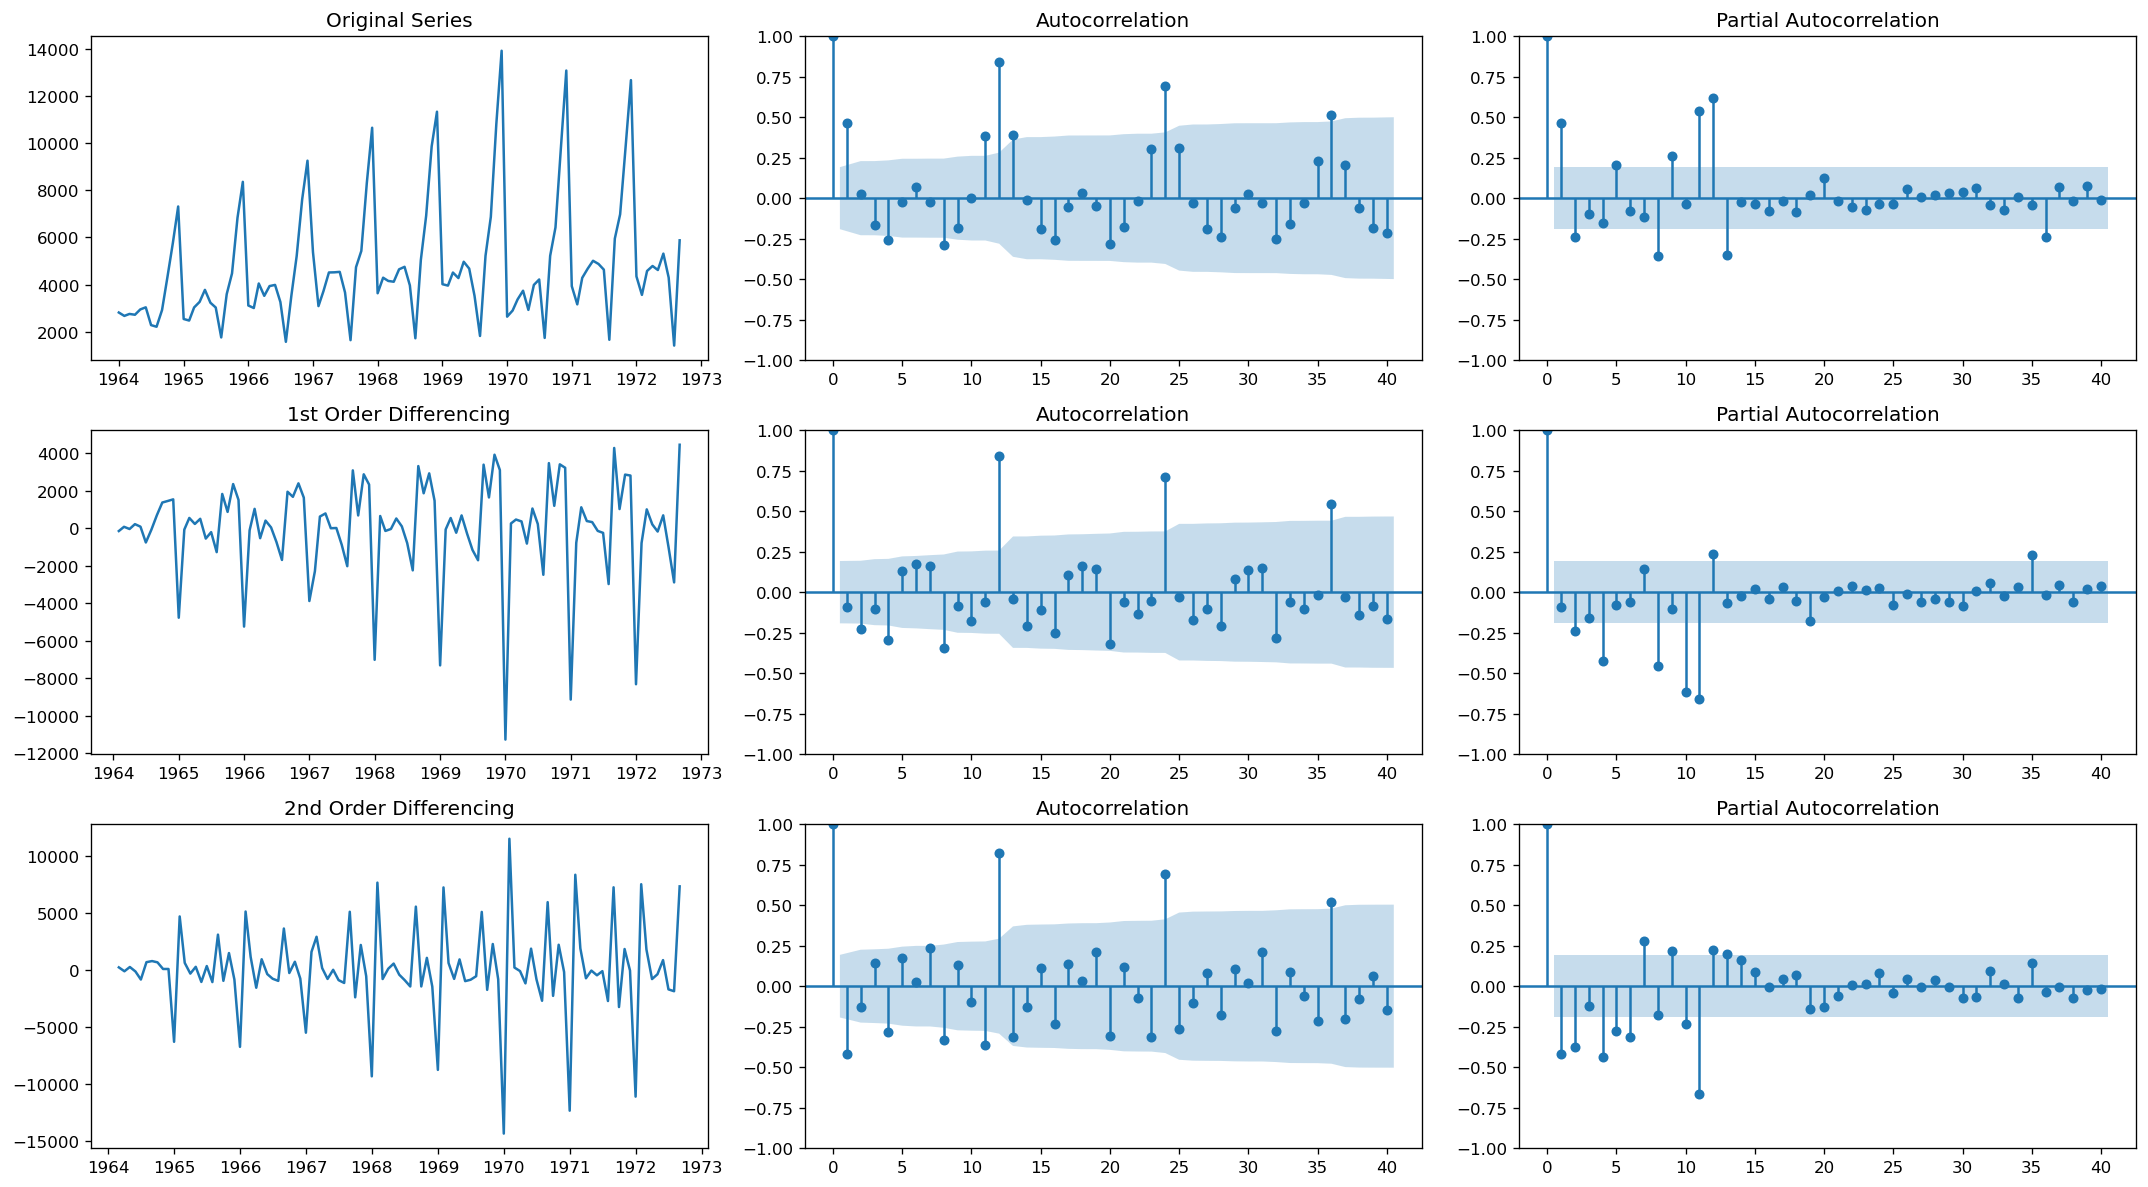

In [22]:
# Original Series
fig, axes = plt.subplots(3, 3, figsize=(18, 10), dpi=120)
axes[0, 0].set_title('Original Series')
axes[0, 0].plot(df['Sales']); 
sm.graphics.tsa.plot_acf(df['Sales'], lags=40, ax=axes[0, 1])
sm.graphics.tsa.plot_pacf(df['Sales'], lags=40, method='ywm', ax=axes[0, 2])

# 1st Differencing
axes[1, 0].set_title('1st Order Differencing')
axes[1, 0].plot(df['Sales'].diff()); 
sm.graphics.tsa.plot_acf(df['Sales'].diff().dropna(), lags=40, ax=axes[1, 1])
sm.graphics.tsa.plot_pacf(df['Sales'].diff().dropna(), lags=40, method='ywm', ax=axes[1, 2])

# 12nd Differencing
axes[2, 0].set_title('2nd Order Differencing')
axes[2, 0].plot(df['Sales'].diff().diff()); 
sm.graphics.tsa.plot_acf(df['Sales'].diff().diff().dropna(), lags=40, ax=axes[2, 1])
sm.graphics.tsa.plot_pacf(df['Sales'].diff().diff().dropna(), lags=40, method='ywm', ax=axes[2, 2])

plt.tight_layout()
plt.show()

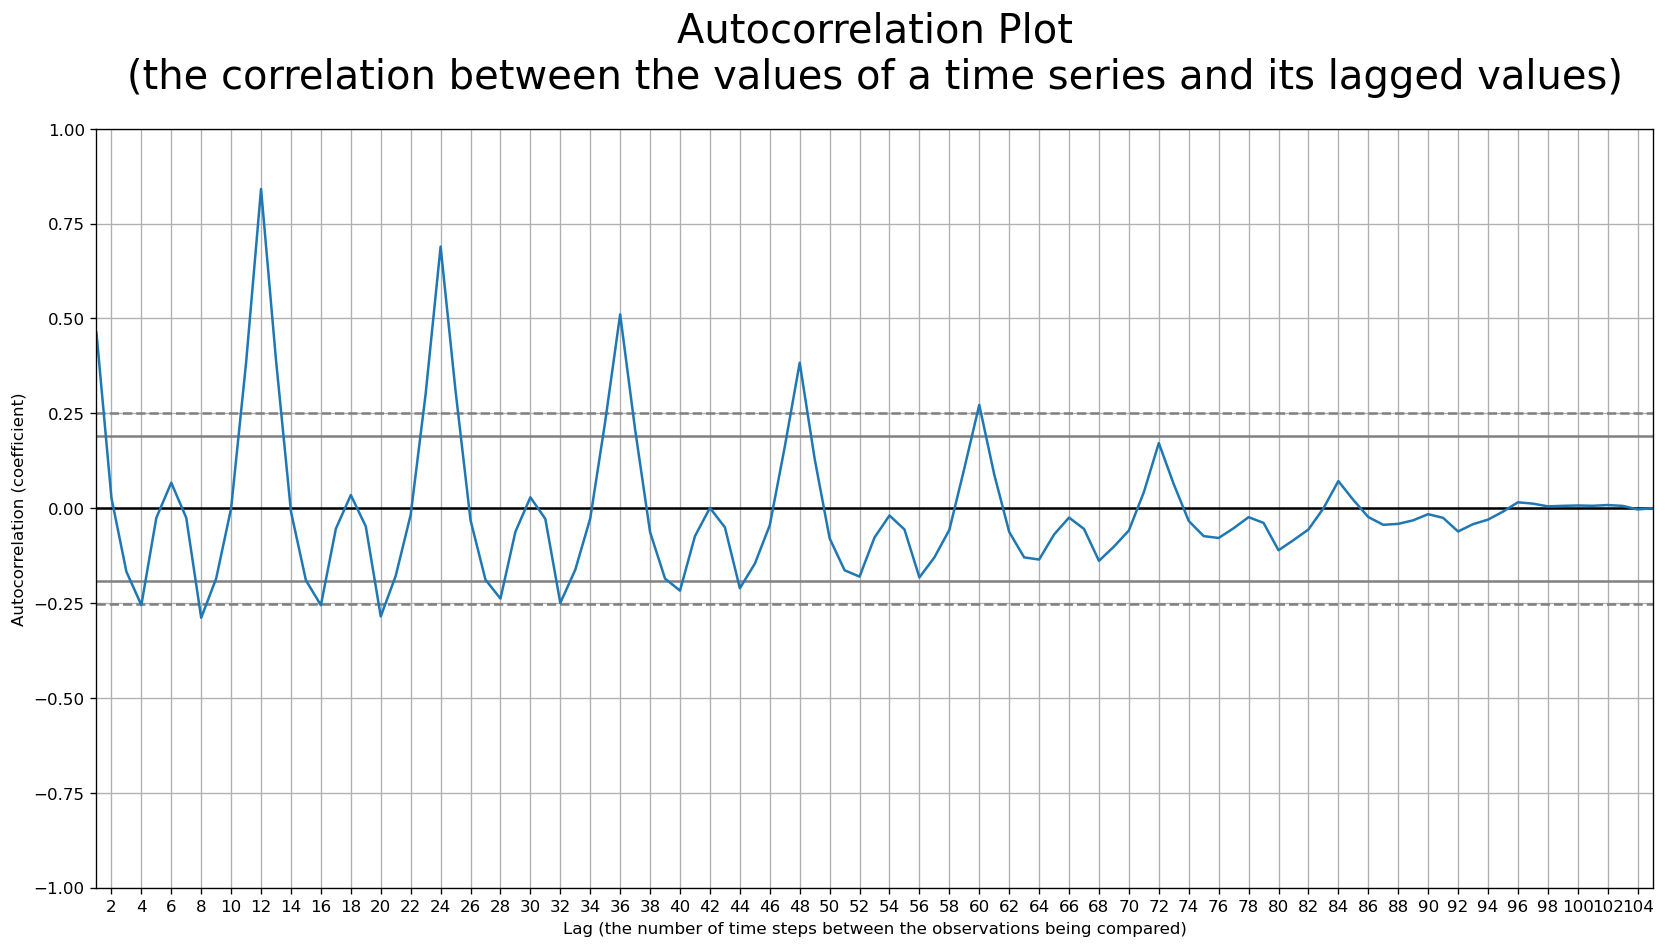

In [23]:
def autocorrelation_df(df, x, y, dpi=120):
    fig = plt.figure(figsize=(14, 8), dpi=dpi)
    
    # Generate autocorrelation plot
    pd.plotting.autocorrelation_plot(df['Sales'])

    # Adjust the tick locator to show all tick locations
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=plt.gca().get_xlim()[1]//2, integer=True))

    # Add labels and title
    plt.xlabel('Lag (the number of time steps between the observations being compared)')
    plt.ylabel('Autocorrelation (coefficient)')
    
    # Set the font size of the title
    plt.title('Autocorrelation Plot\n(the correlation between the values of a time series and its lagged values)', y=1.04, fontsize=24)

    plt.tight_layout()
    plt.grid(True)
    plt.show()

    
autocorrelation_df(df, x=df.index, y=df['Seasonal First Difference'])

# ARIMA Model

- ARIMA   :   Non-seasonal Autoregressive Integrated Moving Averages  -->(p,d,q)
- SARIMA  :   Seasonal ARIMA
- SARIMAX :   Seasonal ARIMA with exogenous variables

The parameters of the ARIMA model can be defined as follows:

- p: The lag order of the autoregressive (AR) model, determined by analyzing the partial autocorrelation function (PACF).
- d: The degree of differencing, which determines how many times the raw observations are differenced to achieve stationarity.
- q: The order of the moving average (MA) model, determined by analyzing the autocorrelation function (ACF).

## TimeSeriesSplit

In [79]:
# from sklearn.model_selection import TimeSeriesSplit
# tss = TimeSeriesSplit(n_splits=2, test_size=24, gap=0).split(y)

# Use if freq warning
# train.index.freq = pd.infer_freq(df.index)
# test.index.freq  = pd.infer_freq(df.index)


from pmdarima.model_selection import train_test_split

# Load/split your data
y = df['Sales']
train, test = pm.model_selection.train_test_split(y, test_size=12)
    
# Perform your desired operations on the train and test sets    
print(train.shape, test.shape)

(93,) (12,)


# Create the auto_arima Model -> ARIMA(p, d, q)(P, D, Q)[s]

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1320.438, Time=0.95 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1315.739, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1313.732, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1314.620, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1325.791, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1315.489, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1314.184, Time=0.27 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1314.673, Time=0.67 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1314.718, Time=0.10 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1315.563, Time=0.90 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1315.716, Time=0.16 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1315.762, Time=0.30 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1315.796, Time=0.32 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1313.652, Time=0.36 sec
 ARIMA(0,0,1)(0,1,0

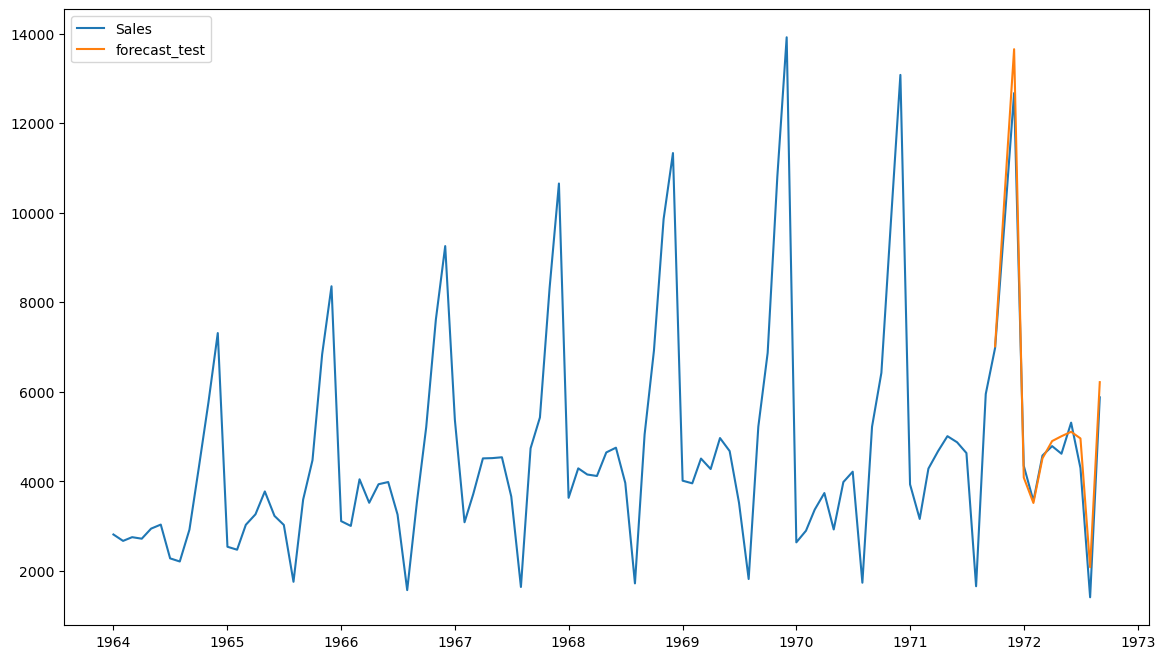

In [81]:
# pmdarima framework automatically hepls you find out the best suited parameters for your model
# Fit your ARIMA(p, d, q)(P, D, Q)[s], 
model = pm.auto_arima(train, m=12, maxiter=100, trace=True, suppress_warnings=True)
# display(model.summary())


# make your forecasts
forecast_test  = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
plt.figure(figsize=(14, 8))
plt.plot(y.index, y, label='Sales')
plt.plot(test.index, forecast_test, label='forecast_test')
plt.legend()
plt.show()

## Create the ARIMA(p,d,q) Model

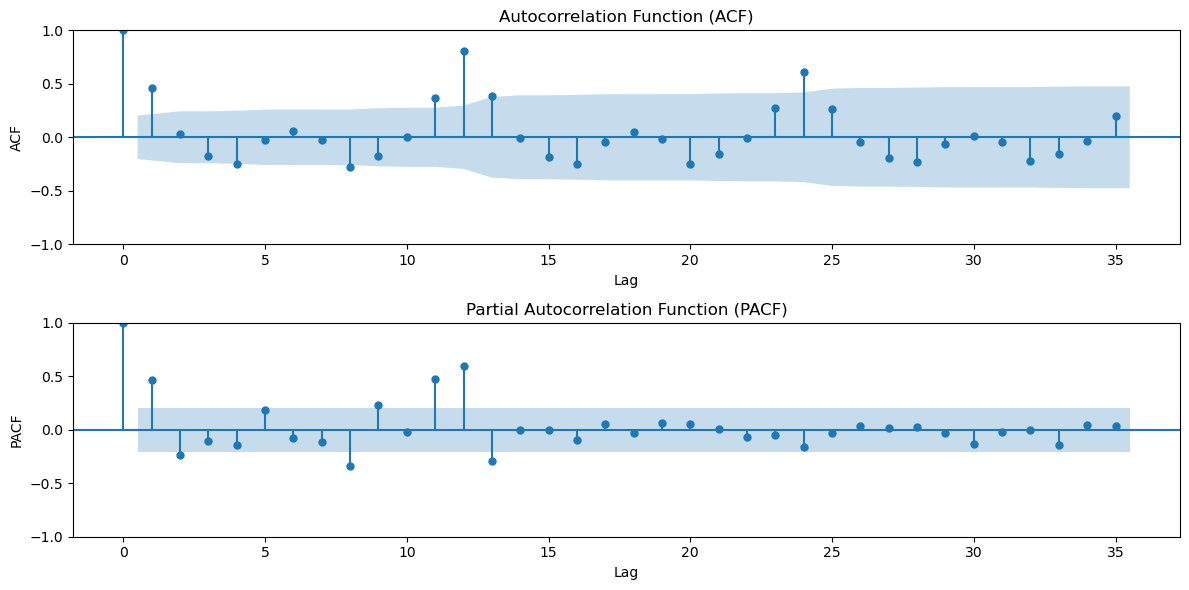

adf: 0 kpss: 1 pp: 0
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   93
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -852.770
Date:                Mon, 12 Jun 2023   AIC                           1707.540
Time:                        21:34:02   BIC                           1710.061
Sample:                    01-01-1964   HQIC                          1708.557
                         - 09-01-1971                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.516e+06   5.08e+05     12.820      0.000    5.52e+06    7.51e+06
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):               151.20
Prob(Q):                  

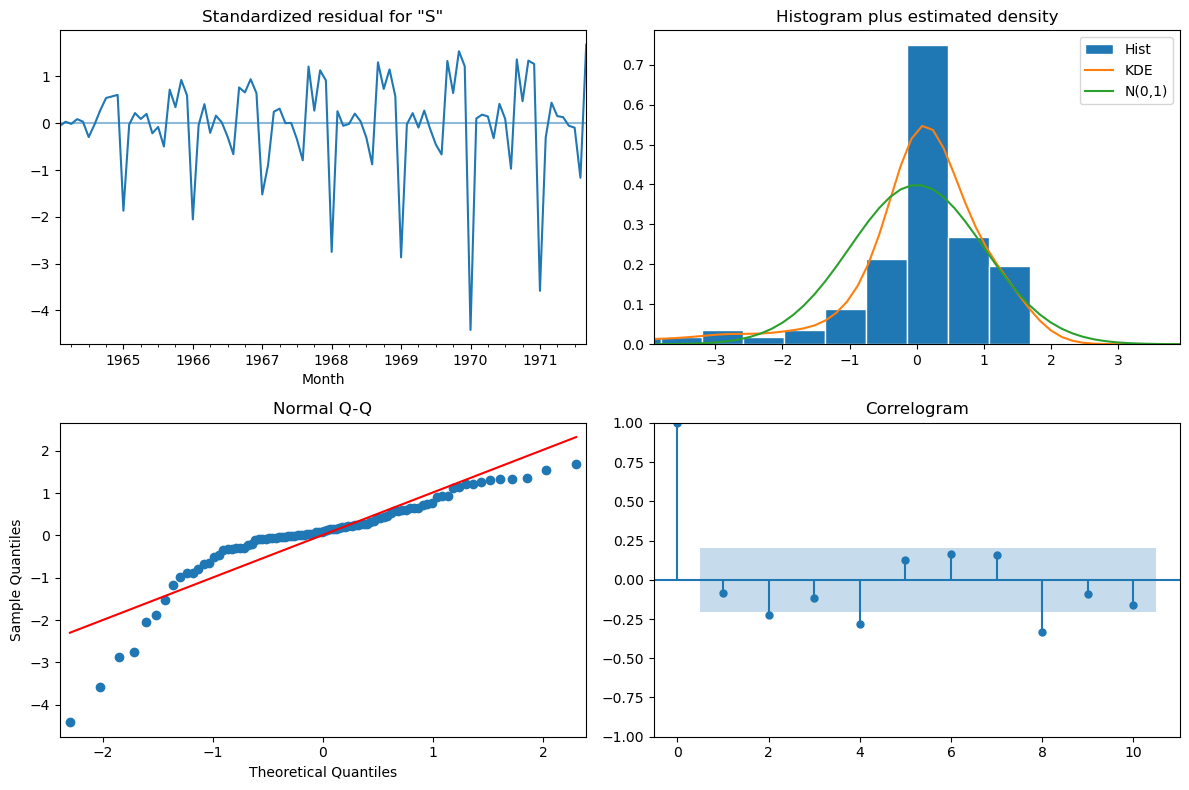

In [82]:
# Step 1: Plot the ACF and PACF
acf  = sm.tsa.stattools.acf(train, nlags=None)
pacf = sm.tsa.stattools.pacf(train, nlags=None)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
# Plot ACF
# plt.stem(acf)
sm.graphics.tsa.plot_acf(train, lags=35, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_ylabel('ACF')
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF
# plt.stem(pacf)
sm.graphics.tsa.plot_pacf(train, lags=35, method='ywm', ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_ylabel('PACF')
ax2.set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()


# Step 2: Identify potential values for 'q' and 'p'
# Look for significant spikes within the confidence interval


# Step 3: Determine the value for 'd'
# Check for stationarity using tests like ADF or visual inspection

# Estimate the number of differences using an Adf Test, KPSS test (defaulth), PP test
test_adf  = pm.arima.utils.ndiffs(y, test='adf')
test_kpss = pm.arima.utils.ndiffs(y, test='kpss')
test_pp   = pm.arima.utils.ndiffs(y, test='pp')

print('adf:', test_adf, 'kpss:', test_kpss, 'pp:', test_pp)
# Example: If differencing is needed to achieve stationarity
d = 1


# Step 4: Refine parameter values
# Build an ARIMA model and evaluate its performance

# Example: Assume initial values 'p' = 0 and 'q' = 0
p = 0
q = 0


# Create the ARIMA(p,d,q) Model, Fit the model
model = sm.tsa.ARIMA(train,
                     order=(p,d,q),               # order = (p, d, q)
                     freq='MS',                   # Specify the frequency as 'MS' for monthly data
                    ).fit(method_kwargs={'maxiter':1000})
# Evaluate the model
print(model.summary())
# model.mle_retvals


# Examine diagnostic plots
model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [83]:
# Save the model permanently and check
with open('model/model_arima.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model
with open('model/model_arima.pkl', 'rb') as f:
    model = pickle.load(f)

ARIMA Model Train Data RMSE: 2569.226
ARIMA Model Test Data RMSE : 2864.149


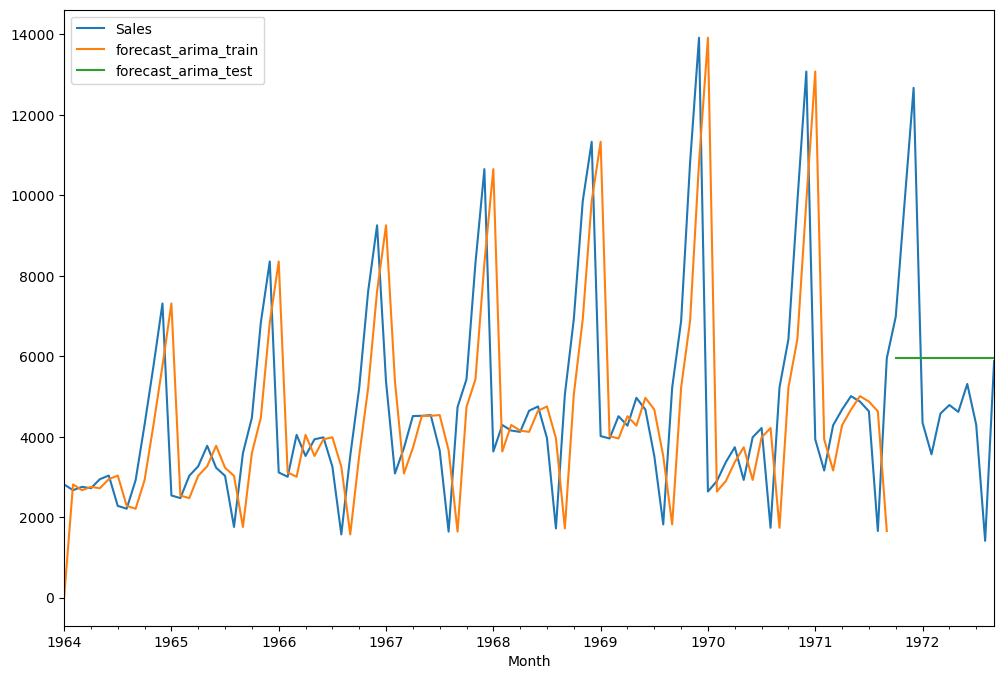

In [84]:
# Plotting the Model and Prediction Test Data
from sklearn.metrics import mean_squared_error

# Make Predictions, start and end are the index range to be predicted
df['forecast_arima_train'] = model.predict(start=train.index[0], end=train.index[-1])
df['forecast_arima_test']  = model.predict(start=test.index[0],  end=test.index[-1])
df[['Sales', 'forecast_arima_train', 'forecast_arima_test']].plot(figsize=(12, 8));

y_train_pred = df['forecast_arima_train'].dropna().values
y_test_pred  = df['forecast_arima_test'].dropna().values

print(f'ARIMA Model Train Data RMSE: {mean_squared_error(train, y_train_pred, squared=False):.3f}')
print(f'ARIMA Model Test Data RMSE : {mean_squared_error(test,  y_test_pred,  squared=False):.3f}')

# SARIMAX Model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08739D+00    |proj g|=  6.91294D-02

At iterate    5    f=  7.08528D+00    |proj g|=  1.42430D-04

At iterate   10    f=  7.08523D+00    |proj g|=  8.10881D-03

At iterate   15    f=  7.08416D+00    |proj g|=  1.99527D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   9.507D-07   7.084D+00
  F =   7.0838904834447858     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
        

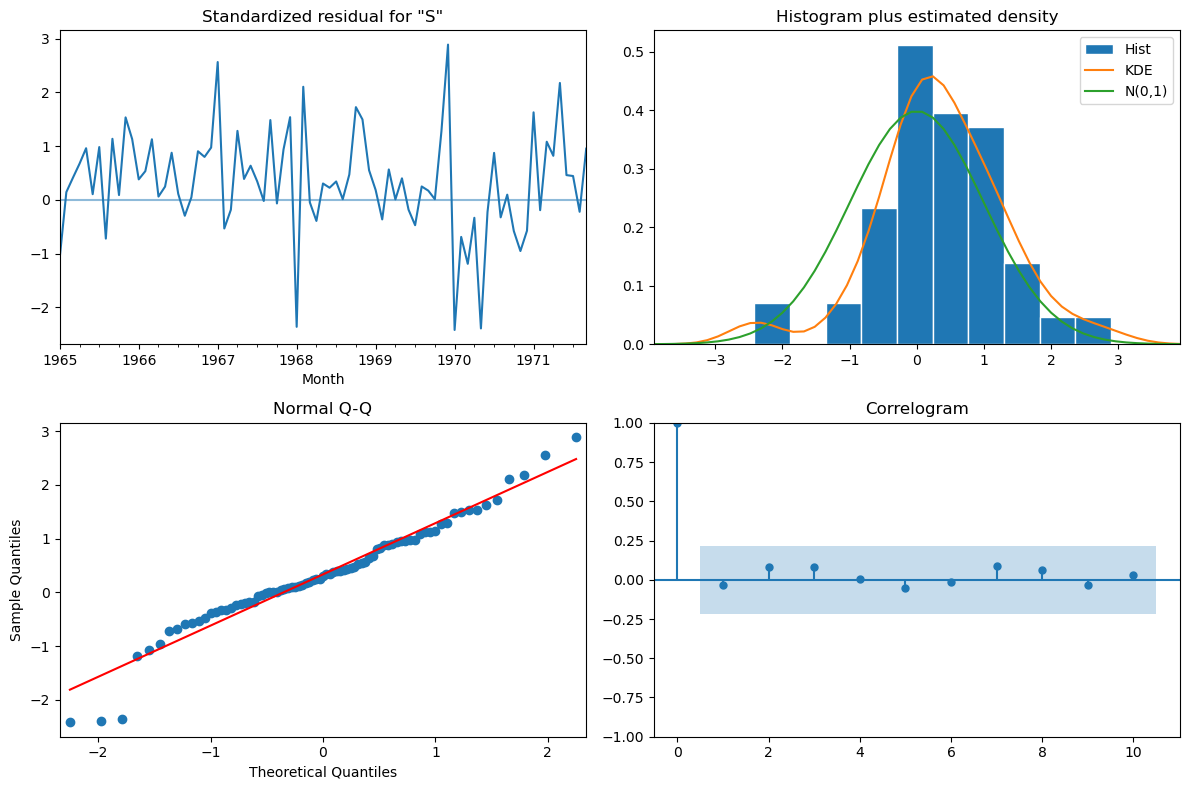

In [85]:
model = sm.tsa.statespace.SARIMAX(train,
                                  order=(0,0,1),              # order = (p, d, q)
                                  seasonal_order=(1,1,0,12),  # seasonal_order = (p, d, q, shift)
                     freq='MS',                   # Specify the frequency as 'MS' for monthly data
                    )
model = model.fit(maxiter=1000)
# Evaluate the model
print(model.summary())
# model.mle_retvals

# Examine diagnostic plots
model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [86]:
# Save the model permanently and check
with open('model/model_sarimax.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model
with open('model/model_sarimax.pkl', 'rb') as f:
    model = pickle.load(f)

ARIMA Model Train Data RMSE: 1473.267
ARIMA Model Test Data RMSE : 337.567


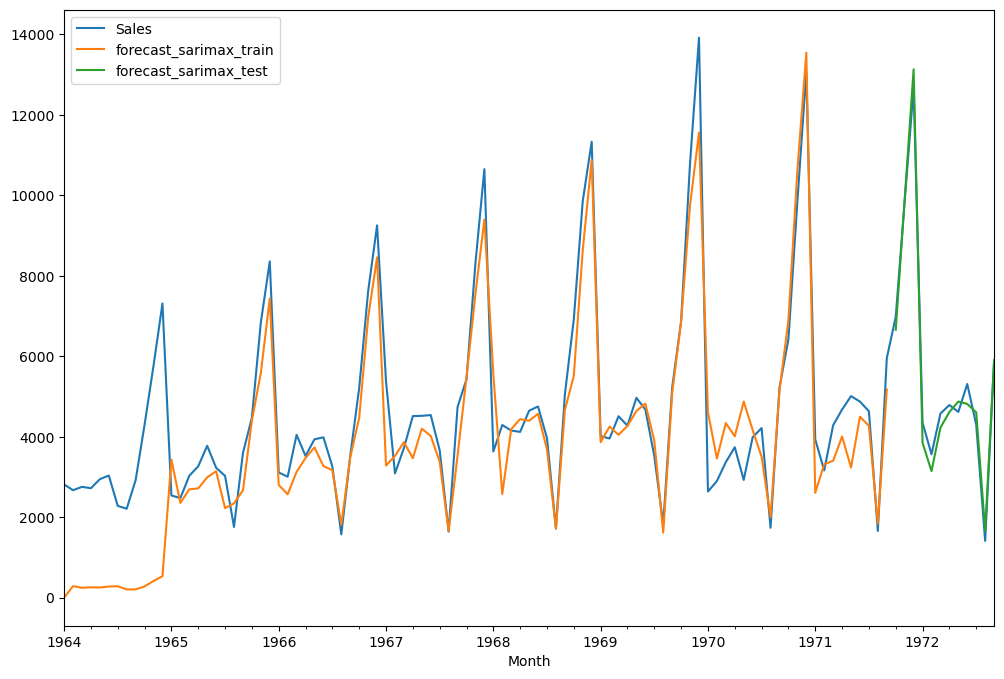

In [87]:
# Plotting the Model and Prediction Test Data
from sklearn.metrics import mean_squared_error

# Make Predictions, start and end are the index range to be predicted
df['forecast_sarimax_train'] = model.predict(start=train.index[0], end=train.index[-1])
df['forecast_sarimax_test']  = model.predict(start=test.index[0],  end=test.index[-1])
df[['Sales', 'forecast_sarimax_train', 'forecast_sarimax_test']].plot(figsize=(12, 8));

y_train_pred = df['forecast_sarimax_train'].dropna().values
y_test_pred  = df['forecast_sarimax_test'].dropna().values

print(f'ARIMA Model Train Data RMSE: {mean_squared_error(train, y_train_pred, squared=False):.3f}')
print(f'ARIMA Model Test Data RMSE : {mean_squared_error(test,  y_test_pred,  squared=False):.3f}')

**Note**:

- Here the **BLUE** line is **ACTUAL DATA**, **ORANGE and GREEN** line is **PREDICTED DATA**. How good it gave us the results.

## Predict For Future Dataset:

In [88]:
# Existing index
existing_index = y.index # df.index

# Determine the start and end dates for the new index
start_date = existing_index[-1] + pd.DateOffset(months=1)
end_date   = start_date + pd.DateOffset(years=10, months=2)

# Generate the new index
future_dates = pd.date_range(start=start_date, end=end_date, freq='MS')

# Combine the existing and new index
future_datest_df = pd.DataFrame(index=future_dates[1:], columns=['future_dates_forecast_sarimax'])
future_datest_df.tail()

,future_dates_forecast_sarimax
1982-08-01,NaN
1982-09-01,NaN
1982-10-01,NaN
1982-11-01,NaN
1982-12-01,NaN


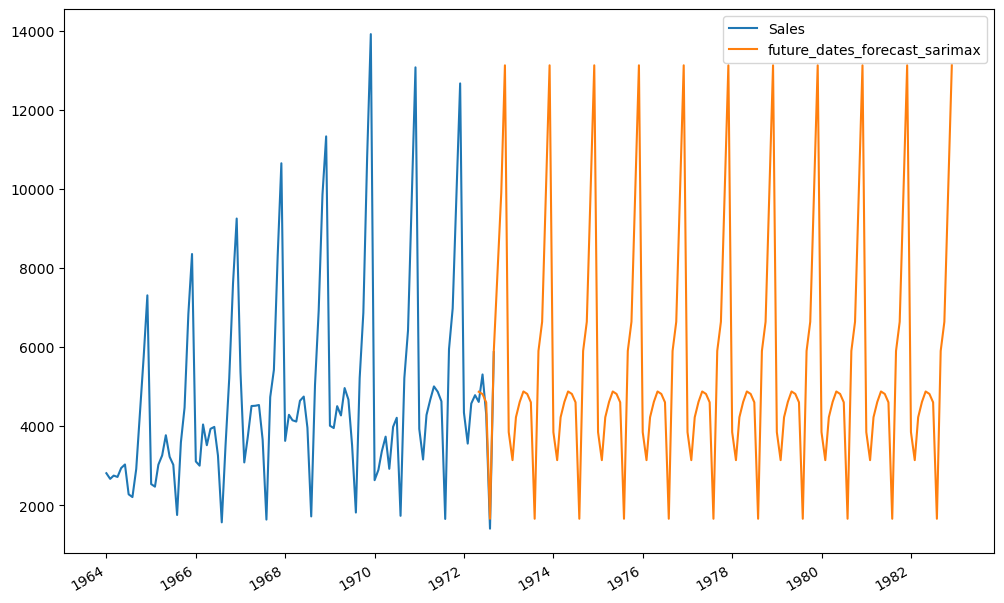

In [89]:
# Concatinating future_dates
future_df = pd.concat([df, future_datest_df])
future_df.tail()

# Predictions 
future_df['future_dates_forecast_sarimax'] = model.predict(start=y.index[-5], end=future_dates[-1]) 

# Plotting
future_df[['Sales', 'future_dates_forecast_sarimax']].plot(figsize=(12, 8));

In [90]:
from IPython.display import FileLink, FileLinks
os.makedirs('model', exist_ok=True)

model_        = FileLink('model/model_arima.pkl', result_html_prefix="Click here to download: ")
model_weights = FileLink('model/model_sarimax.pkl', result_html_prefix="Click here to download: ")
display(model_, model_weights)

/mnt/c/Users/clk/Jupyter_Notebook/perrin-freres-monthly-champagne-sales/model/model_arima.pkl

/mnt/c/Users/clk/Jupyter_Notebook/perrin-freres-monthly-champagne-sales/model/model_sarimax.pkl

<p style="text-align:center; background-color: tomato; color: Jaguar; border-radius:10px; font-family:monospace; 
        line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
        <strong>The End of The Project</strong></p> 